Example Notebook for using secondaryStructure.py
========================================
This module contains the SecondaryStructure object, with methods for convenient plotting of data on top of secondary structure diagrams.
* [Importing modules](#importing-modules)
* [Defining data paths](#defining-data-paths)
* [Sequence coloring](#sequence-coloring)
* [Plotting RInG data](#plotting-ring-data)


Importing modules
-----------------
I like to put this at the top of my notebook, all in one place, so that I can see my whole
python environment. The first line, `%matplotlib inline` ensures that plots are rendered
within the notebook. You can use `sys.path.append('path/to/module')` to add modules that are
not normally in your path.

In [1]:
# Set up Python environment

%matplotlib inline
# import sys
# sys.path.append('/nas/longleaf/home/psirving/JNBTools')
import secondaryStructure as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Defining data paths
-------------------
This is where I read in all of my data and set paths to files.

For plottingTools.py functions, a pandas dataframe object is passed.

For JNBarcPlot.py, only the file paths are needed.

In [2]:
path = 'data/'
xrnapath = path+'RC_CRYSTAL_STRUCTURE.xrna'
profilepath = path+'example1_rnasep_profile.txt'
ringpath = path+'example-rnasep.corrs'

Sequence coloring
-----------------
There are two built-in color schemes, "profile" which is based on the reactivity profile, and "sequence" which is based on nucleotide identity.
- Sequence:
  - A: darker blue
  - U: lighter blue
  - G: darker red
  - C: lighter red
- Profile:
  - negative: grey
  - 0.0-0.4: black
  - 0.4-0.85: orange
  - over 0.85: red

You can also pass a list of valid matplotlib colors, with the same length as the RNA.

Sequence markers
----------------
Any valid matplotlib marker can be passed to marker. You can also pass "sequence" which will use the sequence lettering for the data marker. This defaults to closed circles ('o').

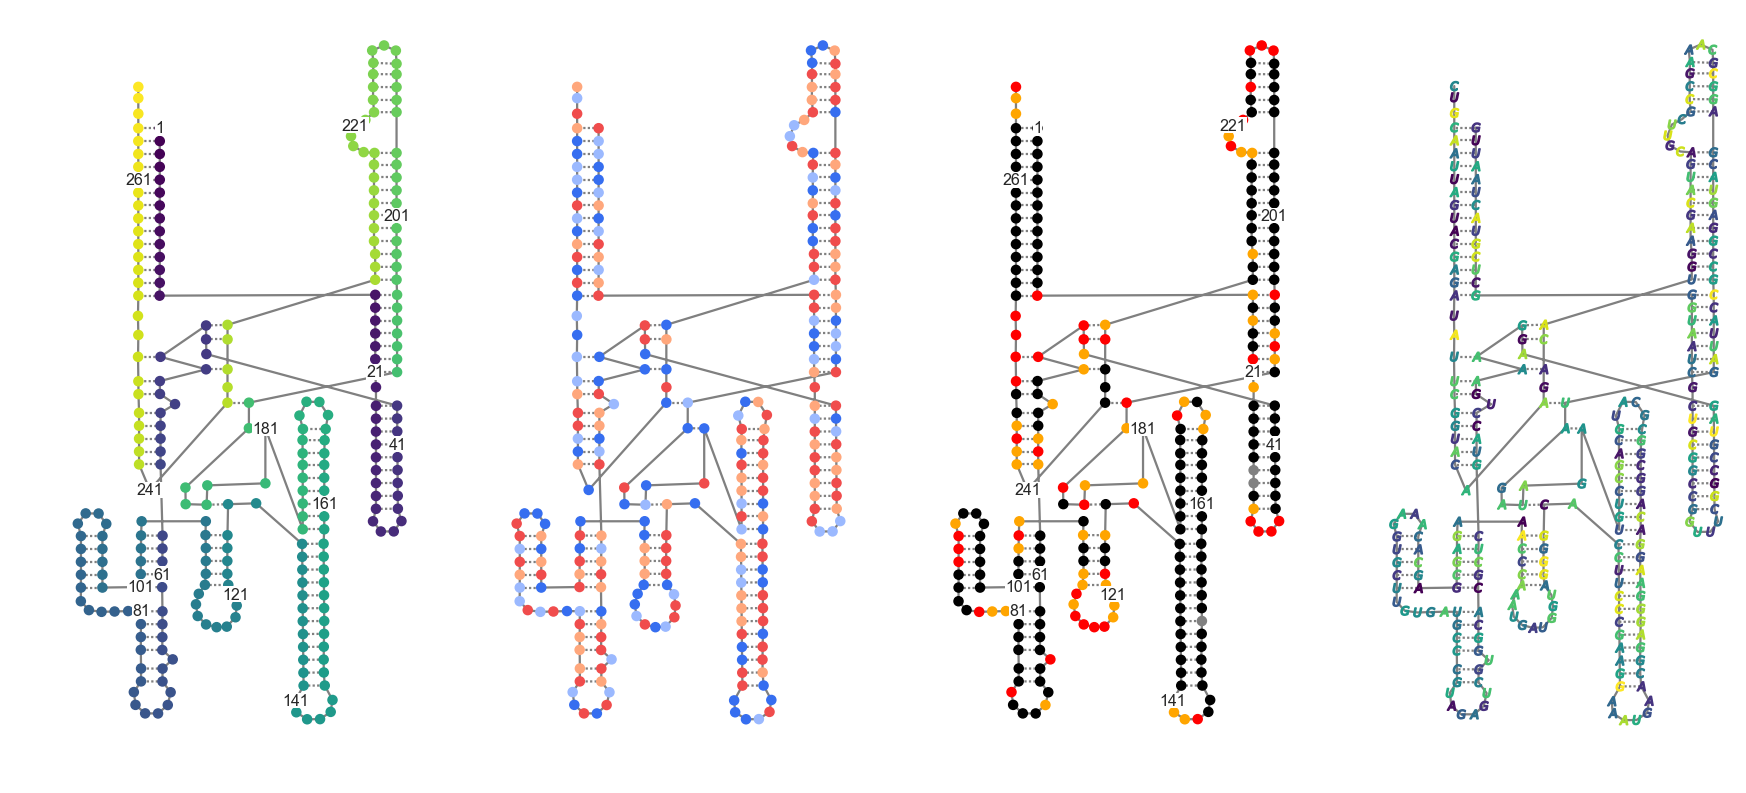

In [3]:
RNaseP = ss.SecondaryStructure(structure_file=xrnapath, profile=profilepath, structureCassettes=True)

# for figsize, use RNA.figsize(rows,columns)
fig, ax = plt.subplots(1,4, figsize=RNaseP.figsize(1,4))

# Plot 1: no markers
RNaseP.makePlot(ax[0], colorby='position')
# Plot 2: Default colors and markers
RNaseP.makePlot(ax[1], positions=False)

# Plot 3: color by reactivity profile
# Alternative syntax
RNaseP.setPlot(ax[2])
RNaseP.plotSS(ax[2])
RNaseP.plotSequence(ax[2], colorby='profile')
RNaseP.plotPositions(ax[2])


# Plot 4: custom color map and Sequence markers
cmap = plt.get_cmap('viridis')
cmap = [cmap(np.random.random()) for n in range(RNaseP.length)]
RNaseP.makePlot(ax[3], colorby=cmap, positions=False, markers='sequence')


Plotting RInG data
------------------
Ring coordinates can be adjusted for structure cassettes, filtered by contact distance, or filtered by significance or statistic.

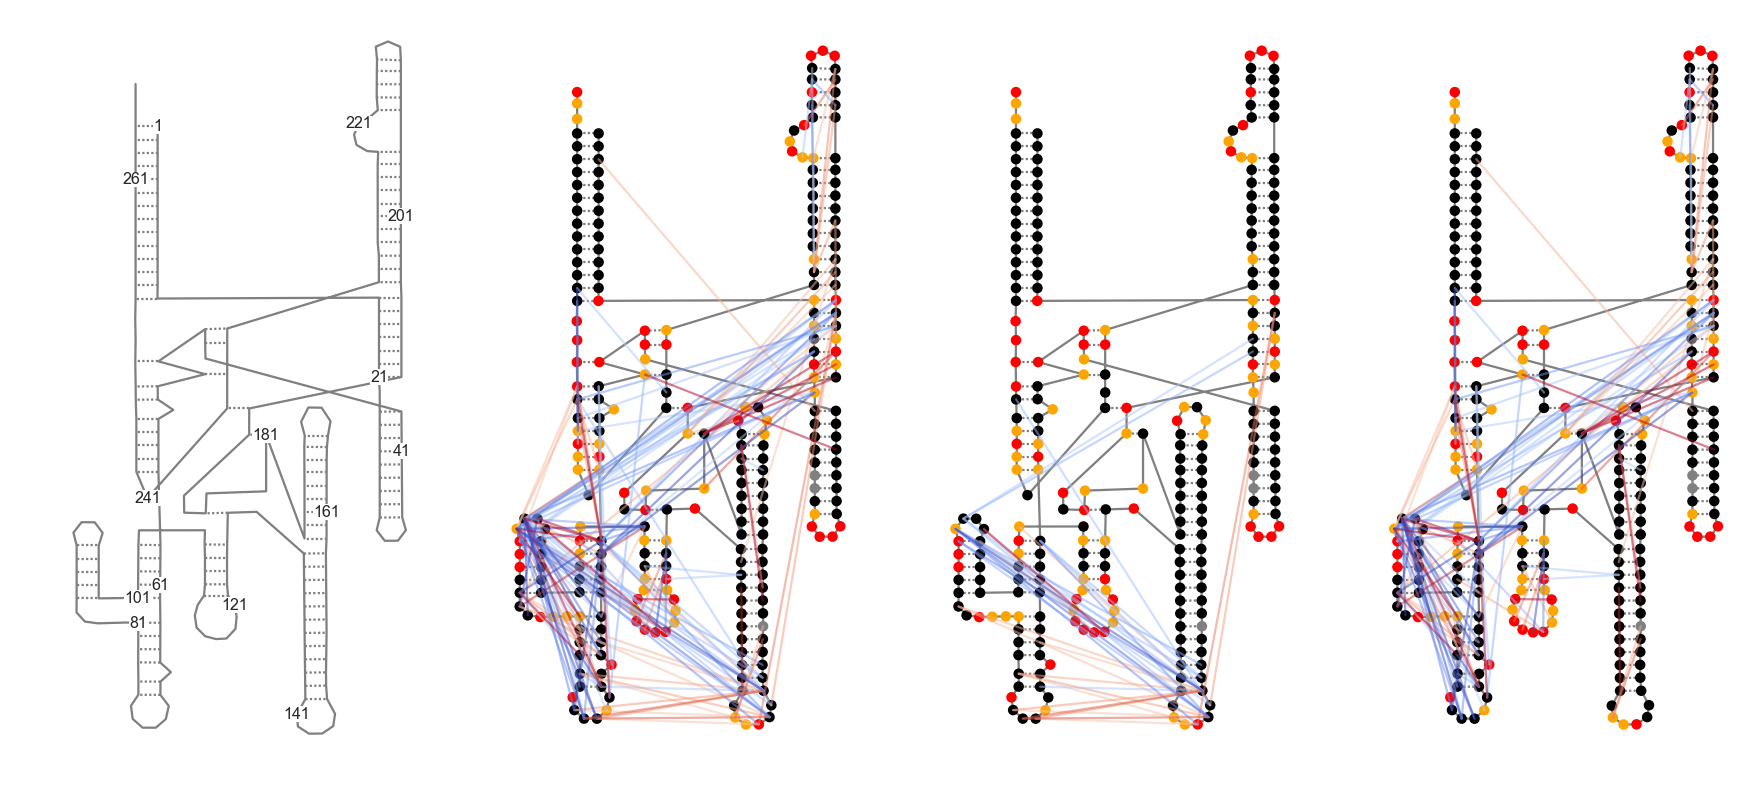

In [4]:
RNaseP = ss.SecondaryStructure(structure_file=xrnapath, ringfile=ringpath, profile=profilepath, structureCassettes=True)

# use secondaryStructure.figsize(rows, columns) to get appropriate figure size
fig, ax = plt.subplots(1,4, figsize=RNaseP.figsize(1,4))

# Plot 1: Don't plot sequence or rings
RNaseP.makePlot(ax[0], sequence=False, rings=False)

# Plot 2: default plot
RNaseP.makePlot(ax[1], colorby='profile', positions=False)

# Plot 3: filter RInGs by cd > 20, stat > 20
RNaseP.filterRings(cdAbove=20, statistic=20)
RNaseP.setPlot(ax[2])
RNaseP.plotSS(ax[2])
RNaseP.plotSequence(ax[2], colorby='profile')
RNaseP.plotRings(ax[2])

# Plot 4: filter RInGs by cd < 20, stat > 20
RNaseP.filterRings(cdBelow=21, statistic=20)
RNaseP.makePlot(ax[3], colorby='profile', positions=False)
